In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data= pd.read_csv('Dataset/Gym_membership.csv')
#data.isnull().sum()

In [4]:
#data.dtypes
#data.info()
#data.describe()

## ensure no duplicated data
#duplicated_data = data[data.duplicated()]
#duplicated_data.shape

In [5]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [6]:
#data.groupby('Workout_Type')['Calories_Burned'].mean()
#data['Workout_Type'].value_counts()

#FROM WHO, ppl who above 20 
#BMI	
# Below 18.5 Underweight
#18.5–24.9 Normal weight
# 25.0–29.9 Pre-obesity
# 30.0–34.9 Obesity class I
# 35.0–39.9 Obesity class II
# Above 40 Obesity class III

#bins = [0, 18.5, 24.99999, 29.99999, 34.99999, 39.9000, float('inf')]
#labels = ['Underweight', 'Normal Weight','Pre-Obesity', 'Obesity Class I', 'Obesity Class II', 'Obesity Class III']
#data['Health_Status'] = pd.cut(data['BMI'], bins= bins, labels=labels, right = False)

#bins = [0, 18.5, 24.99999, 29.99999, 34.99999, 39.9000, float('inf')]
#labels = [0, 1, 2, 3, 4, 5]
#data['Health_Status'] = pd.cut(data['BMI'], bins= bins, labels=labels, right = False)

In [7]:
#data.groupby('Health_Status')['Calories_Burned'].mean()


In [8]:

#from sklearn.preprocessing import StandardScaler,LabelEncoder
#from sklearn.model_selection import train_test_split


In [9]:
#label_en = LabelEncoder()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

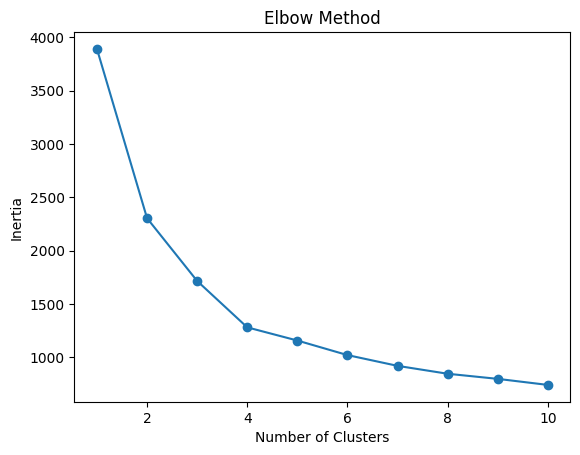

Silhouette Score: 0.32361765119478614
Davies-Bouldin Index: 1.188689949578136


KeyError: 'Cluster'

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Calories_Burned', 'Session_Duration (hours)', 'Fat_Percentage', 'BMI']])
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):  # Trying k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to your dataframe


from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
sil_score = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {sil_score}')

# Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, clusters)
print(f'Davies-Bouldin Index: {db_index}')

# Assuming `data` is your DataFrame with the 'Cluster' column added
# You can group by the 'Cluster' and calculate the mean for each feature

# Step 4: Group by Cluster and Calculate the Mean for Only Numeric Columns
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Group by 'Cluster' and calculate the mean for numeric columns
cluster_means = data[numeric_cols].groupby('Cluster').mean()

# Display the means for each cluster
print(cluster_means)

from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA components and the cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('2D PCA of Clusters')
plt.show()




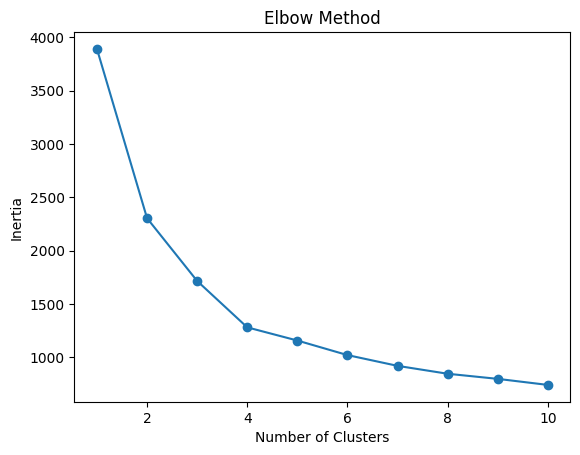

               Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
Cluster                                                               
0        38.073892    73.261084    1.729261  180.576355  144.152709   
1        39.298174    61.490061    1.723164  179.087221  143.458418   
2        38.036101    96.296029    1.716643  180.794224  144.032491   

         Resting_BPM  Session_Duration (hours)  Calories_Burned  \
Cluster                                                           
0          62.315271                  1.739310      1261.886700   
1          62.590264                  1.105233       780.356998   
2          61.501805                  1.171625       866.776173   

         Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  \
Cluster                                                                         
0             15.217241               3.107882                       4.448276   
1             28.347465               2.385801                   

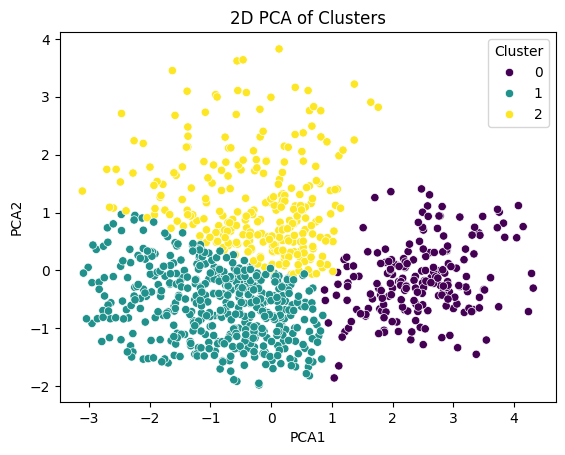

In [73]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Assuming you have already loaded your dataset into `data`
# Example: data = pd.read_csv('your_data.csv')

# Step 1: Data Preprocessing - Scaling the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Calories_Burned', 'Session_Duration (hours)', 'Fat_Percentage', 'BMI']])

# Step 2: Elbow Method to Find the Optimal Number of Clusters
inertia = []
for k in range(1, 11):  # Trying k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 3: Apply K-Means Clustering (Let's assume 3 clusters based on the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to your dataframe
data['Cluster'] = clusters

# Step 4: Group by Cluster and Calculate the Mean for Only Numeric Columns
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Group by 'Cluster' and calculate the mean for numeric columns
cluster_means = data[numeric_cols].groupby('Cluster').mean()

# Display the means for each cluster
print(cluster_means)

# Step 5: Reduce Dimensions to 2D using PCA for Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA components and the cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters in 2D using PCA components
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('2D PCA of Clusters')
plt.show()



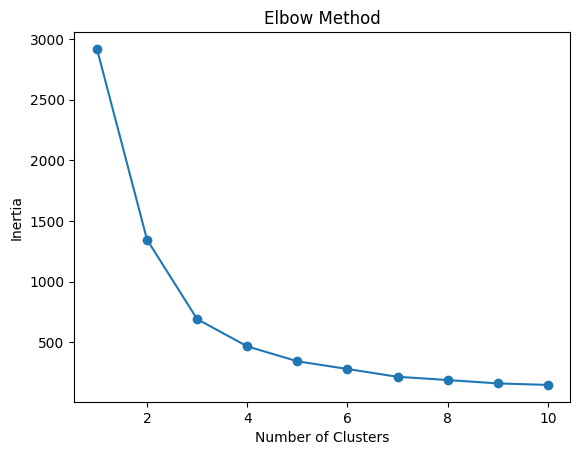

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the relevant features for clustering
features = data[['Experience_Level', 'Session_Duration (hours)', 'Calories_Burned']]

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Use Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


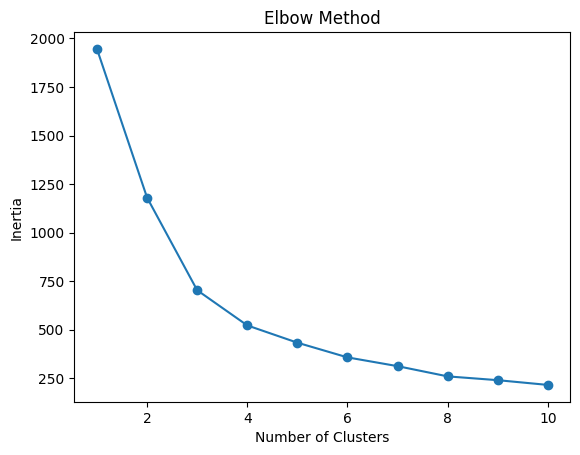

               Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
Cluster                                                               
0        38.255507    73.180617    1.732026  180.264317  143.814978   
1        38.839248    61.106054    1.720877  179.139875  143.803758   
2        38.767790    97.298876    1.717603  180.895131  143.659176   

         Resting_BPM  Session_Duration (hours)  Calories_Burned  \
Cluster                                                           
0          62.621145                  1.660000      1204.559471   
1          62.394572                  1.133027       801.561587   
2          61.576779                  1.134682       837.426966   

         Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  \
Cluster                                                                         
0             15.763436               3.065639                       4.281938   
1             28.682881               2.368894                   

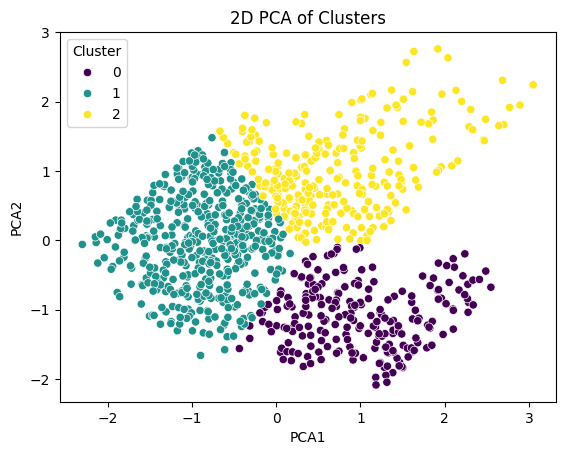

Silhouette Score: 0.4246
Davies-Bouldin Index: 0.8199


In [170]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Step 1: Data Preprocessing - Scaling the Data
# Assuming you have already loaded your dataset into `data`
# Example: data = pd.read_csv('your_data.csv')

# Select features related to body composition (BMI and Fat_Percentage)
features = ['BMI', 'Fat_Percentage']  # Add or remove columns based on your analysis

# Scale the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Step 2: Elbow Method to Find the Optimal Number of Clusters
inertia = []
for k in range(1, 11):  # Trying k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 3: Apply K-Means Clustering (Let’s assume 3 clusters based on the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to your dataframe
data['Cluster'] = clusters

# Step 4: Group by Cluster and Calculate the Mean for Only Numeric Columns
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Group by 'Cluster' and calculate the mean for numeric columns
cluster_means = data[numeric_cols].groupby('Cluster').mean()

# Display the means for each cluster
print(cluster_means)

# Step 5: Reduce Dimensions to 2D using PCA for Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA components and the cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters in 2D using PCA components
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('2D PCA of Clusters')
plt.show()


# Silhouette Score
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_index:.4f}")


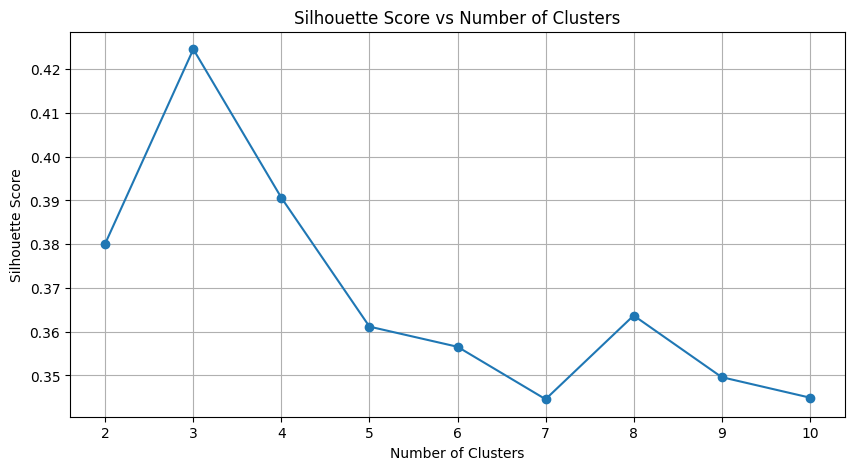

In [171]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Trying different values of k for KMeans (1 to 10 clusters)
inertia = []
sil_scores = []

for k in range(2, 11):  # Start from 2 clusters up to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Calculate the Silhouette Score for each k
    sil_score = silhouette_score(scaled_data, clusters)
    sil_scores.append(sil_score)
    
    inertia.append(kmeans.inertia_)

# Plot Silhouette Score vs Number of Clusters
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sil_scores, marker='o', label='Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


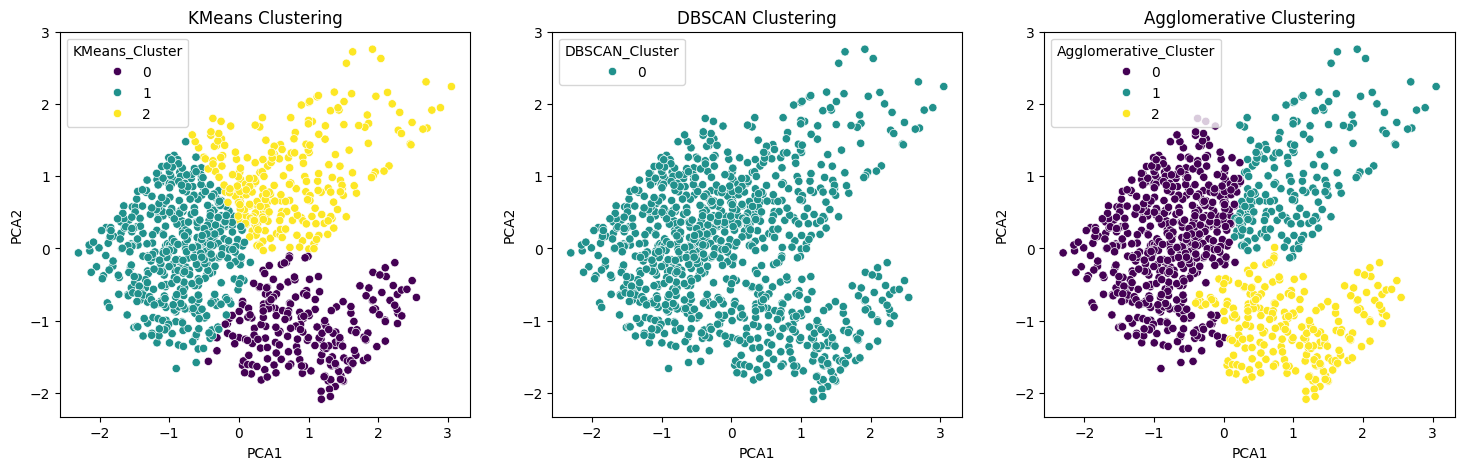

KMeans - Silhouette Score: 0.4246, Davies-Bouldin Index: 0.8199
DBSCAN - Silhouette Score: -1.0000, Davies-Bouldin Index: inf
Agglomerative - Silhouette Score: 0.4053, Davies-Bouldin Index: 0.8099
KMeans Cluster Means:
         Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  Resting_BPM  \
0  38.255507    73.180617    1.732026  180.264317  143.814978    62.621145   
1  38.839248    61.106054    1.720877  179.139875  143.803758    62.394572   
2  38.767790    97.298876    1.717603  180.895131  143.659176    61.576779   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                  1.660000      1204.559471       15.763436   
1                  1.133027       801.561587       28.682881   
2                  1.134682       837.426966       26.161049   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0               3.065639                       4.281938          2.762115   
1               2.368894                       3.033403  

In [138]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into `data`
# Example: data = pd.read_csv('your_data.csv')

# Step 1: Data Preprocessing - Scaling the Data
# Select features related to body composition and workout (BMI, Fat_Percentage, Session_Duration)
features = ['BMI', 'Fat_Percentage']  # Including Session_Duration

# Scale the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Step 2: Apply K-Means Clustering (as a reference for comparison)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(scaled_data)

# Step 3: Apply DBSCAN
# DBSCAN requires epsilon (eps) and min_samples (min points in a cluster)
dbscan = DBSCAN(eps=0.5, min_samples=4)
clusters_dbscan = dbscan.fit_predict(scaled_data)

# Step 4: Apply Agglomerative Clustering
# Agglomerative Clustering can be configured to find a specific number of clusters or based on a distance threshold.
agglomerative = AgglomerativeClustering(n_clusters=3)
clusters_agg = agglomerative.fit_predict(scaled_data)

# Step 5: Dimensionality Reduction using PCA for Visualization (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA components for visualization
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['KMeans_Cluster'] = clusters_kmeans
pca_df['DBSCAN_Cluster'] = clusters_dbscan
pca_df['Agglomerative_Cluster'] = clusters_agg

# Visualizing Clusters (KMeans, DBSCAN, Agglomerative Clustering)
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# KMeans visualization
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis', ax=ax[0])
ax[0].set_title('KMeans Clustering')

# DBSCAN visualization (outliers are labeled as -1)
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='viridis', ax=ax[1])
ax[1].set_title('DBSCAN Clustering')

# Agglomerative Clustering visualization
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Agglomerative_Cluster', palette='viridis', ax=ax[2])
ax[2].set_title('Agglomerative Clustering')

plt.show()

# Step 6: Evaluate Clustering Performance using Silhouette Score and Davies-Bouldin Index

# Check if DBSCAN has more than 1 cluster (ignoring noise points)
if len(set(clusters_dbscan)) > 1:
    sil_score_dbscan = silhouette_score(scaled_data, clusters_dbscan)
    db_index_dbscan = davies_bouldin_score(scaled_data, clusters_dbscan)
else:
    sil_score_dbscan = -1  # When DBSCAN assigns only one cluster
    db_index_dbscan = float('inf')  # Impossible to calculate DBI for one cluster

# KMeans Evaluation
sil_score_kmeans = silhouette_score(scaled_data, clusters_kmeans)
db_index_kmeans = davies_bouldin_score(scaled_data, clusters_kmeans)

# Agglomerative Clustering Evaluation
sil_score_agg = silhouette_score(scaled_data, clusters_agg)
db_index_agg = davies_bouldin_score(scaled_data, clusters_agg)

# Display the evaluation metrics for each clustering method
print(f"KMeans - Silhouette Score: {sil_score_kmeans:.4f}, Davies-Bouldin Index: {db_index_kmeans:.4f}")
print(f"DBSCAN - Silhouette Score: {sil_score_dbscan:.4f}, Davies-Bouldin Index: {db_index_dbscan:.4f}")
print(f"Agglomerative - Silhouette Score: {sil_score_agg:.4f}, Davies-Bouldin Index: {db_index_agg:.4f}")

# Step 7: Group by Cluster and Calculate the Mean for Only Numeric Columns
numeric_cols = data.select_dtypes(include=['number']).columns

# For KMeans
cluster_means_kmeans = data[numeric_cols].groupby(clusters_kmeans).mean()
print("KMeans Cluster Means:")
print(cluster_means_kmeans)

# For DBSCAN (handling outliers labeled as -1)
cluster_means_dbscan = data[numeric_cols].groupby(clusters_dbscan).mean()
print("DBSCAN Cluster Means:")
print(cluster_means_dbscan)

# For Agglomerative Clustering
cluster_means_agg = data[numeric_cols].groupby(clusters_agg).mean()
print("Agglomerative Cluster Means:")
print(cluster_means_agg)


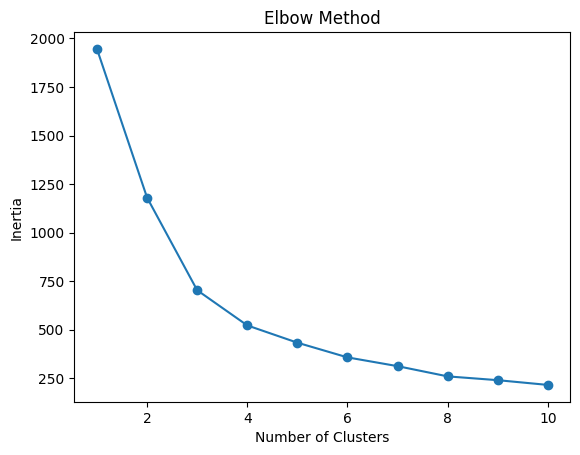

               Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
Cluster                                                               
0        38.255507    73.180617    1.732026  180.264317  143.814978   
1        38.839248    61.106054    1.720877  179.139875  143.803758   
2        38.767790    97.298876    1.717603  180.895131  143.659176   

         Resting_BPM  Session_Duration (hours)  Calories_Burned  \
Cluster                                                           
0          62.621145                  1.660000      1204.559471   
1          62.394572                  1.133027       801.561587   
2          61.576779                  1.134682       837.426966   

         Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  \
Cluster                                                                         
0             15.763436               3.065639                       4.281938   
1             28.682881               2.368894                   

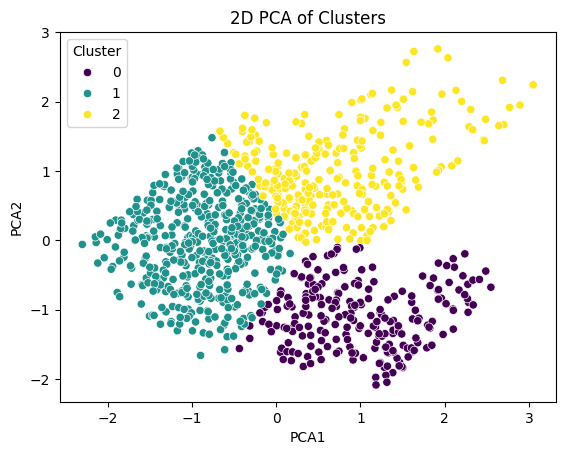

Silhouette Score: 0.4246
Davies-Bouldin Index: 0.8199


IndexError: index 2 is out of bounds for axis 1 with size 2

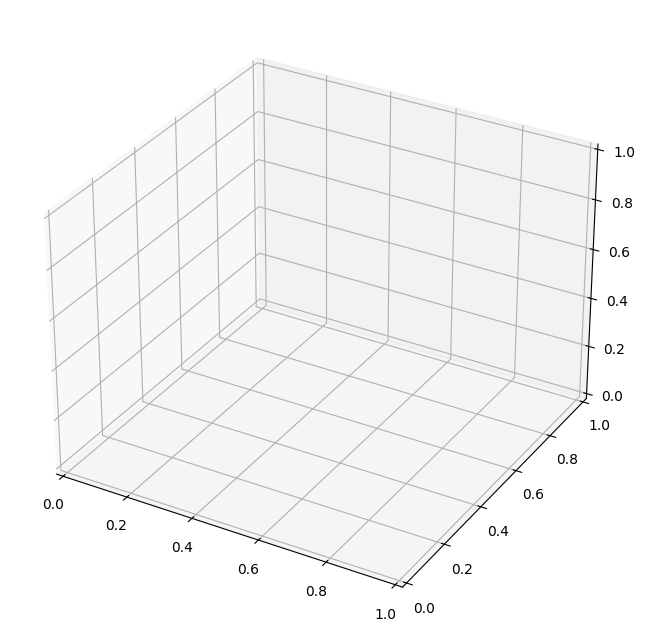

In [165]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Step 1: Data Preprocessing - Scaling the Data
# Assuming you have already loaded your dataset into `data`
# Example: data = pd.read_csv('your_data.csv')

# Select features related to body composition (BMI and Fat_Percentage)
features = ['BMI', 'Fat_Percentage']  # Add or remove columns based on your analysis

# Scale the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Step 2: Elbow Method to Find the Optimal Number of Clusters
inertia = []
for k in range(1, 11):  # Trying k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 3: Apply K-Means Clustering (Let’s assume 3 clusters based on the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to your dataframe
data['Cluster'] = clusters

# Step 4: Group by Cluster and Calculate the Mean for Only Numeric Columns
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Group by 'Cluster' and calculate the mean for numeric columns
cluster_means = data[numeric_cols].groupby('Cluster').mean()

# Display the means for each cluster
print(cluster_means)

# Step 5: Reduce Dimensions to 2D using PCA for Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA components and the cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters in 2D using PCA components
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('2D PCA of Clusters')
plt.show()


# Silhouette Score
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_index:.4f}")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c=clusters_kmeans, cmap='viridis')
plt.show()


from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_components = tsne.fit_transform(scaled_data)
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=clusters_kmeans, palette='viridis')
plt.show()


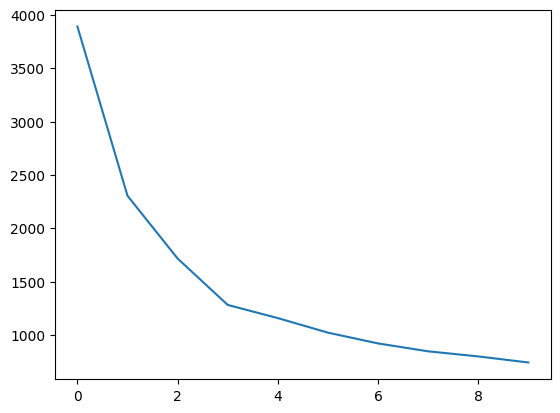

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans
plt.plot(inertia)